In [1]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis = 0)

In [3]:
final_output_sequence

array([1.        , 1.        , 0.99999999, ..., 1.        , 1.        ,
       1.        ])

In [5]:
from keras.layers import SimpleRNN, Embedding
from keras.models import Sequential

In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [14]:
max_features = 10000 
maxlen = 500
batch_size = 32

In [15]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [16]:
print(len(input_train), ' sekwencje treningowe')
print(len(input_test), ' sekwencje testowe')

25000  sekwencje treningowe
25000  sekwencje testowe


In [17]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(input_train.shape)
print(input_test.shape)

(25000, 500)
(25000, 500)


In [18]:
from keras.layers import Dense

In [20]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [24]:
history = model.fit(input_train, y_train, epochs=10, batch_size=1024, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 55s 3s/step - loss: 0.3301 - acc: 0.8662 - val_loss: 0.3763 - val_acc: 0.8440
Epoch 2/10
20/20 [==============================] - 58s 3s/step - loss: 0.2977 - acc: 0.8860 - val_loss: 0.3807 - val_acc: 0.8418
Epoch 3/10
20/20 [==============================] - 57s 3s/step - loss: 0.2791 - acc: 0.8906 - val_loss: 0.4038 - val_acc: 0.8256
Epoch 4/10
20/20 [==============================] - 58s 3s/step - loss: 0.2494 - acc: 0.9054 - val_loss: 0.3763 - val_acc: 0.8438
Epoch 5/10
20/20 [==============================] - 58s 3s/step - loss: 0.2317 - acc: 0.9144 - val_loss: 0.4184 - val_acc: 0.8074
Epoch 6/10
20/20 [==============================] - 58s 3s/step - loss: 0.1818 - acc: 0.9366 - val_loss: 0.3723 - val_acc: 0.8436
Epoch 7/10
20/20 [==============================] - 58s 3s/step - loss: 0.1559 - acc: 0.9474 - val_loss: 0.3480 - val_acc: 0.8670
Epoch 8/10
20/20 [==============================] - 55s 3s/step - loss: 0.1330 - acc: 0.95

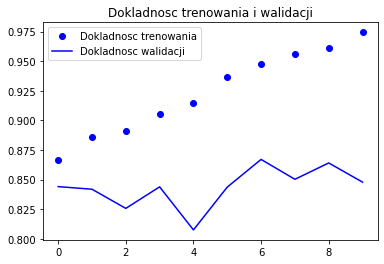

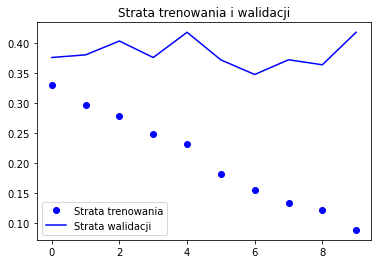

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [26]:
model.save_weights('.\modele\IMDB_5_SimpleRNN_weigths.h5')
model.save('.\modele\IMDB_5_SimpleRNN_model.h5')

In [40]:
from keras.layers import LSTM

In [41]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=1024, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 3s 62ms/step - loss: 0.6698 - acc: 0.6410 - val_loss: 0.5795 - val_acc: 0.7812
Epoch 2/10
20/20 [==============================] - 1s 47ms/step - loss: 0.5220 - acc: 0.7783 - val_loss: 0.4452 - val_acc: 0.8288
Epoch 3/10
20/20 [==============================] - 1s 47ms/step - loss: 0.4090 - acc: 0.8428 - val_loss: 0.3676 - val_acc: 0.8578
Epoch 4/10
20/20 [==============================] - 1s 47ms/step - loss: 0.3459 - acc: 0.8687 - val_loss: 0.3786 - val_acc: 0.8492
Epoch 5/10
20/20 [==============================] - 1s 47ms/step - loss: 0.3401 - acc: 0.8720 - val_loss: 0.3458 - val_acc: 0.8620
Epoch 6/10
20/20 [==============================] - 1s 47ms/step - loss: 0.2634 - acc: 0.9027 - val_loss: 0.3491 - val_acc: 0.8566
Epoch 7/10
20/20 [==============================] - 1s 47ms/step - loss: 0.2449 - acc: 0.9115 - val_loss: 0.2891 - val_acc: 0.8834
Epoch 8/10
20/20 [==============================] - 1s 47ms/step - loss: 0.2316 - a

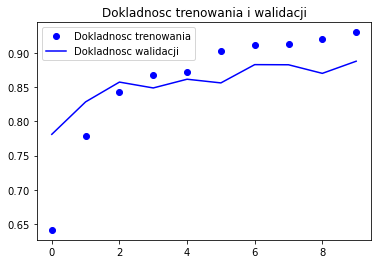

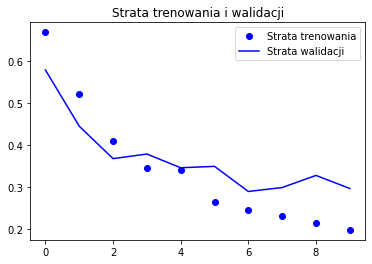

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [44]:
model.save_weights('.\modele\IMDB_6_LSTM_weigths.h5')
model.save('.\modele\IMDB_6_LSTM_model.h5')